II. Programming [9v] 

Consider the diabetes.arff data available at the homework tab, comprising 8 biological features to 
classify 768 patients into 2 classes (normal, diabetes).  
 
 
1) [1v] ANOVA is a statistical test that can be used to assess the discriminative power of a 
single input variable. Using f_Outcomeif from sklearn, identify the input variables with the 
worst and best discriminative power. Plot their Outcome-conditional probability density 
functions.

Best Feature: Glucose
Worst Feature: BloodPressure


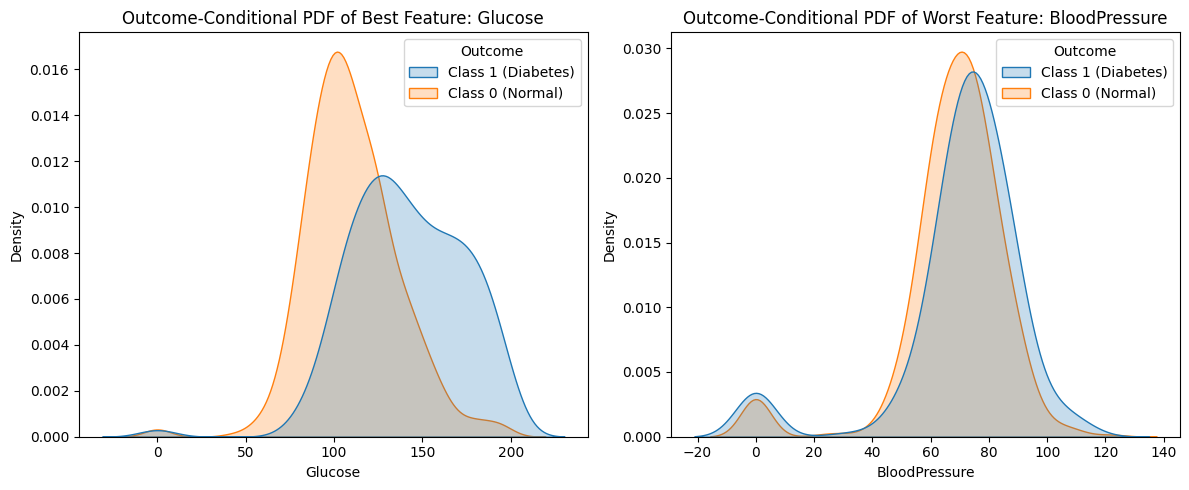

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.feature_selection import f_classif
import seaborn as sns

# Load the diabetes dataset from the ARFF file
data, meta = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data)

# Separate the features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

F_values = f_classif(X, y)[0]

# Perform ANOVA to assess discriminative power of each featf_classiflues = f_classif(X, y)[0]

best_feature = df.columns[F_values.argmax()]
worst_feature = df.columns[F_values.argmin()]

print(f"Best Feature: {best_feature}")
print(f"Worst Feature: {worst_feature}")

outcome_mapping = {'0': 'Class 0 (Normal)', '1': 'Class 1 (Diabetes)'}
df['Outcome'] = df['Outcome'].astype(str).map(outcome_mapping)  # Convert to string and map to new labels


# Plot class-conditional probability density functions for best and worst features
plt.figure(figsize=(12, 5))

# Plot for the best feature
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x=best_feature, hue='Outcome', common_norm=False, fill=True)
plt.title(f'Outcome-Conditional PDF of Best Feature: {best_feature}')
plt.xlabel(best_feature)
plt.ylabel('Density')


# Plot for the worst feature
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x=worst_feature, hue='Outcome', common_norm=False, fill=True)
plt.title(f'Outcome-Conditional PDF of Worst Feature: {worst_feature}')
plt.xlabel(worst_feature)
plt.ylabel('Density')


plt.tight_layout()
plt.show()

2) [4v] Using a stratified 80-20 training-testing split with a fixed seed (random_state=1), assess 
in a single plot both the training and testing accuracies of a decision tree with minimum 
sample split in {2,5,10,20,30,50,100} and the remaining parameters as default.  
[optional] Note that split thresholding of numeric variables in decision trees is non-
deterministic in sklearn, hence you may opt to average the results using 10 runs per 
parameterization.

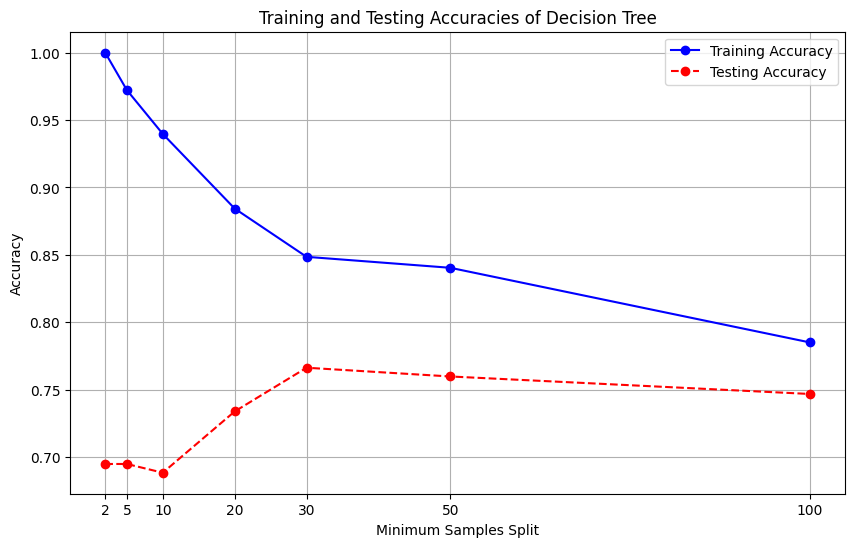

In [1]:
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the diabetes dataset from the ARFF file
data, meta = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data)

# Convert byte strings to regular strings in the class column
df['Outcome'] = df['Outcome'].apply(lambda x: x.decode('utf-8'))

# Separate the features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Set the minimum sample split values to be tested
min_samples_splits = [2, 5, 10, 20, 30, 50, 100]

# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Split the dataset into stratified 80-20 training-testing sets with a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Perform 10 runs to average out the randomness in the split thresholding (optional)
n_runs = 10
for min_samples_split in min_samples_splits:
    train_acc_run = []
    test_acc_run = []
    
    for _ in range(n_runs):
        # Split the dataset into stratified 80-20 training-testing sets with a fixed random state
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
        
        # Create and train the Decision Tree classifier
        clf = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=1)
        clf.fit(X_train, y_train)
        
        # Calculate training accuracy
        y_train_pred = clf.predict(X_train)
        train_acc = accuracy_score(y_train, y_train_pred)
        train_acc_run.append(train_acc)
        
        # Calculate testing accuracy
        y_test_pred = clf.predict(X_test)
        test_acc = accuracy_score(y_test, y_test_pred)
        test_acc_run.append(test_acc)
    
    # Average the accuracies over the runs
    train_accuracies.append(np.mean(train_acc_run))
    test_accuracies.append(np.mean(test_acc_run))

# Plotting the training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_accuracies, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(min_samples_splits, test_accuracies, marker='o', linestyle='--', color='red', label='Testing Accuracy')
plt.title('Training and Testing Accuracies of Decision Tree')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Accuracy')
plt.xticks(min_samples_splits)
plt.grid(True)
plt.legend()
plt.show()


3) [2v] Critically analyze these results, including the generalization capacity across settings. 

4) [2v] To deploy the predictor, a healthcare provider opted to learn a single decision tree 
(random_state=1) using all available data and ensuring that the maximum depth would be 3 
in order to avoid overfitting risks.  
i. Plot the decision tree. 

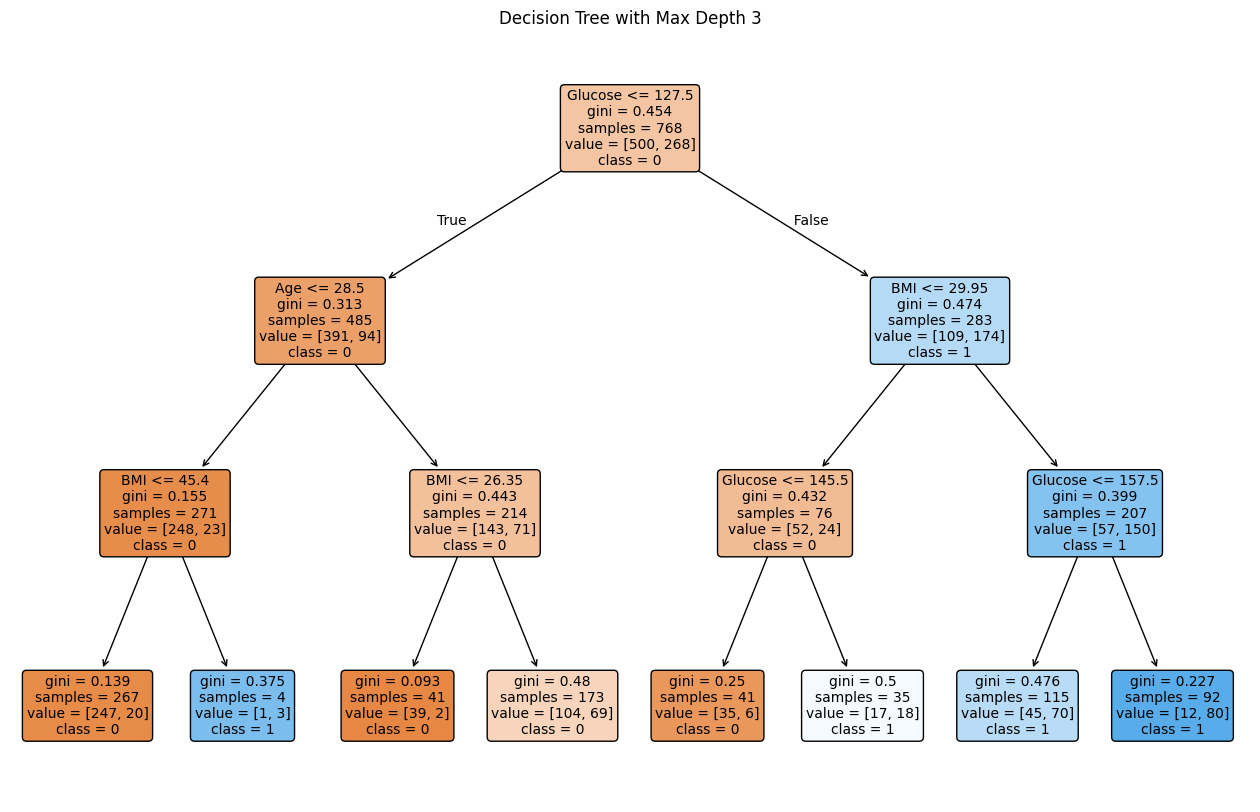

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into a DataFrame `df`
# and the 'Outcome' column is the target variable

# Split the features and target
X = df.drop(columns=['Outcome'])  # Drop the Outcome column to get features
y = df['Outcome']  # Target variable

# Encode the target variable if necessary (from strings to numeric)
# If Outcome is already in numeric form, skip this step
le = LabelEncoder()
y = le.fit_transform(y)

# Initialize and train the Decision Tree with max_depth=3
clf = DecisionTreeClassifier(random_state=1, max_depth=3)
clf.fit(X, y)

# Plotting the decision tree
plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree with Max Depth 3")
plt.show()


ii. Explain what characterizes diabetes by identifying the conditional associations 
together with their posterior probabilities.